# Zadanie 1

Sprawdzić działanie warstw konwolucyjnej, przy użyciu: 
1. Filtra wykrywającego krawędzie poziome 
2. Filtra wykrywającego krawędzie pionowe 
3. Filtra rozmywającego (większy rozmiar, wartości jednakowe równe 1/liczba_wag) Przetestować działanie warstw konwolucyjnych dla obrazu Palais_Royale_Paris.jpg (w odcieniach szarości) oraz dla dowolnego własnego obrau.


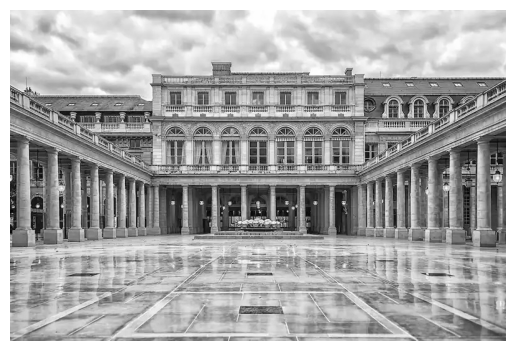

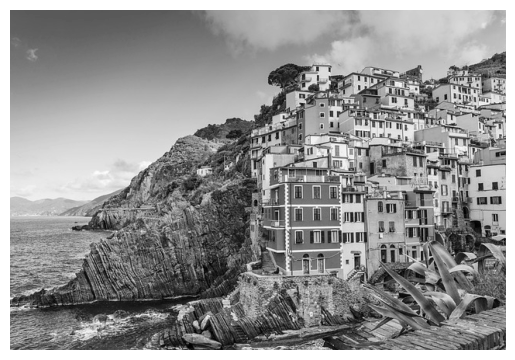

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


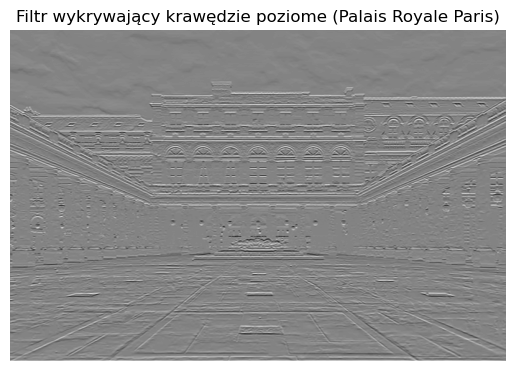

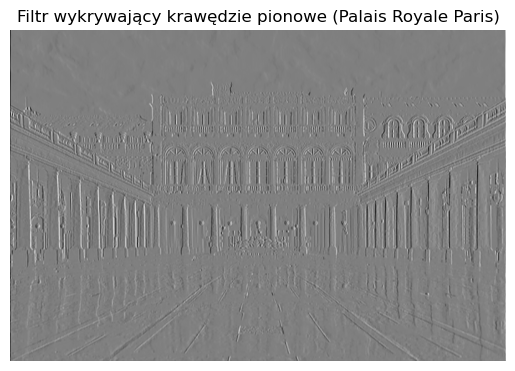

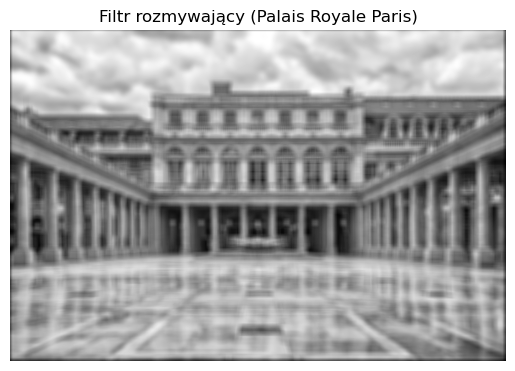

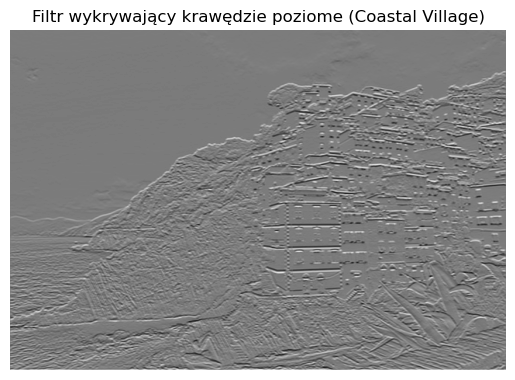

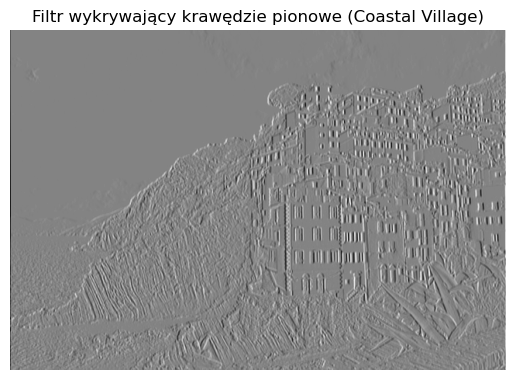

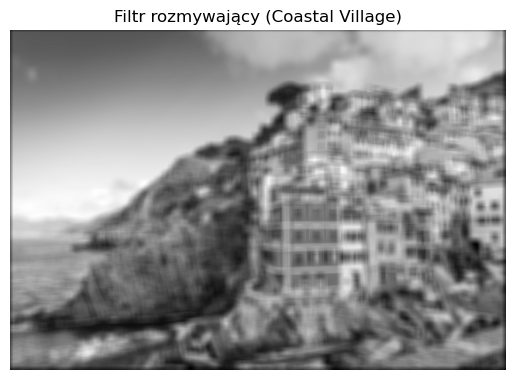

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Input

def load_image(path):
    image = Image.open(path)
    image = image.convert("L")
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
    return np.array(image)

def apply_filter(image_array, kernel):
    kernel_size = len(kernel)
    model = Sequential([
        Input(shape=(image_array.shape[0], image_array.shape[1], 1)),
        Conv2D(filters=1, kernel_size=(kernel_size, kernel_size), padding='same')
    ])
    kernel = np.array(kernel).reshape((kernel_size, kernel_size, 1, 1))
    bias = np.zeros((1,))
    model.get_layer(index=0).set_weights([kernel, bias])
    image_array = tf.expand_dims(image_array, 0)
    image_array = tf.expand_dims(image_array, -1)
    result = model.predict(image_array)
    return tf.squeeze(result).numpy()

image_path = "Palais_Royal_Paris.jpg"
image = load_image(image_path)
image2_path = "coastal-5527726_640.jpg"
image2 = load_image(image2_path)

horizontal_edge_filter = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]
vertical_edge_filter = [[1, 0, -1], [1, 0, -1], [1, 0, -1]]
blur_filter = np.full((10, 10), 1/100)

results = {
    "Filtr wykrywający krawędzie poziome (Palais Royale Paris)": apply_filter(image, horizontal_edge_filter),
    "Filtr wykrywający krawędzie pionowe (Palais Royale Paris)": apply_filter(image, vertical_edge_filter),
    "Filtr rozmywający (Palais Royale Paris)": apply_filter(image, blur_filter),
    "Filtr wykrywający krawędzie poziome (Coastal Village)": apply_filter(image2, horizontal_edge_filter),
    "Filtr wykrywający krawędzie pionowe (Coastal Village)": apply_filter(image2, vertical_edge_filter),
    "Filtr rozmywający (Coastal Village)": apply_filter(image2, blur_filter)
}
for title, result in results.items():
    plt.title(title)
    plt.imshow(result, cmap='gray')
    plt.axis('off')
    plt.show()

# Zadanie 2

Utworzyć prostą sieć konwolucyjną do analizy zbioru MNIST, w skład której powinna wchodzić 
1. 1 warstwa konwolucyjna (f=3, nc=8) 
2. 1 warstwa Max Pooling (f=2) 
3. 1 warstwa softmax 
Sprawdzić parametry sieci, nauczyć sieć konwolucyjną i sprawdzić jakość uzyskanego klasyfikaora


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_layer (Conv2D)                  │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling_layer (MaxPooling2D)     │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_layer (Flatten)              │ (None, 1352)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_layer (Dense)                │ (None, 10)                  │          13,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,610 (53.16 KB)

 Trainable params: 13,610 (53.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8017 - loss: 0.7346 - val_accuracy: 0.9457 - val_loss: 0.1924
Epoch 2/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9413 - loss: 0.2028 - val_accuracy: 0.9695 - val_loss: 0.1226
Epoch 3/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9627 - loss: 0.1365 - val_accuracy: 0.9753 - val_loss: 0.0985
Epoch 4/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9692 - loss: 0.1091 - val_accuracy: 0.9777 - val_loss: 0.0921
Epoch 5/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9740 - loss: 0.0930 - val_accuracy: 0.9755 - val_loss: 0.0918
Epoch 6/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9762 - loss: 0.0845 - val_accuracy: 0.9800 - val_loss: 0.0769
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9680 - loss: 0.0996
Test Loss: 0.0823802724480629
Test Accuracy: 0.9735999703407288


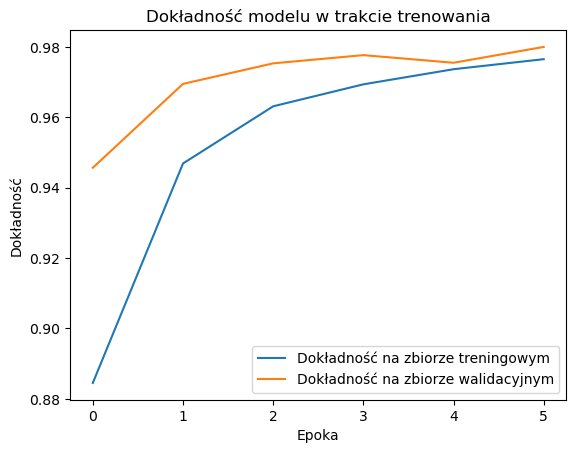

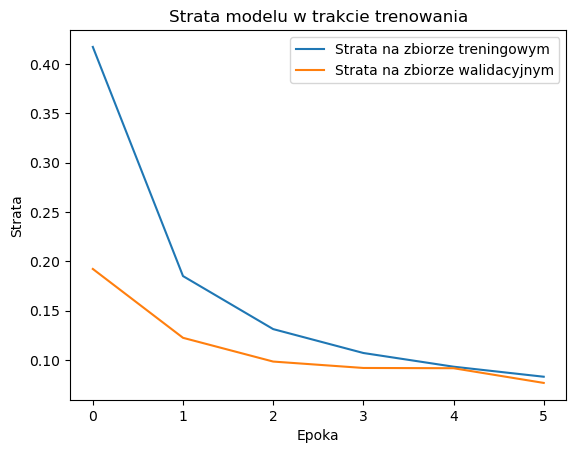

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

model = Sequential([
    Input(shape=(28, 28, 1), name='input_layer'),
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu', name='conv_layer'),
    MaxPooling2D(pool_size=(2, 2), name='max_pooling_layer'),
    Flatten(name='flatten_layer'),
    Dense(10, activation='softmax', name='softmax_layer')
])

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.1, epochs=6, batch_size=64)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

plt.plot(history.history['accuracy'], label='Dokładność na zbiorze treningowym')
plt.plot(history.history['val_accuracy'], label='Dokładność na zbiorze walidacyjnym')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.title('Dokładność modelu w trakcie trenowania')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Strata na zbiorze treningowym')
plt.plot(history.history['val_loss'], label='Strata na zbiorze walidacyjnym')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.title('Strata modelu w trakcie trenowania')
plt.legend()
plt.show()